In [5]:
import numpy as np
from HARK.ConsumptionSaving.ConsPortfolioModel import SequentialPortfolioConsumerType
from pytest import approx

from sharkfin.broker import *
from sharkfin.expectations import *
from sharkfin.population import *
from sharkfin.simulation import *
from simulate.parameters import LUCAS0, WHITESHARK, build_population

import math
from math import exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# initialize population
pop = build_population(
    SequentialPortfolioConsumerType,
    LUCAS0,
    rng=np.random.default_rng(1),
)

# arguments to attention simulation

a = 0.2
q = 1
r = 1
market = None

days_per_quarter = 30

attsim = AttentionSimulation(
    pop,
    FinanceModel,
    a=a,
    q=q,
    r=r,
    market=market,
    days_per_quarter=days_per_quarter,
    fm_args={"p1": 0.5},
)
attsim.simulate(burn_in=20)

## testing for existence of this class stat
attsim.pop.class_stats()["mNrm_ratio_StE_mean"]

data = attsim.daily_data()

sim_stats = attsim.sim_stats()


run_market, buy_sell: (0, 0)
None
price: 99.80778268841532
dividend: 0.08317315224034609
run_market, buy_sell: (0, 0)
None
price: 101.20492186658893
dividend: 0.08433743488882411
run_market, buy_sell: (0, 0)
None
price: 101.18019601397124
dividend: 0.0843168300116427
run_market, buy_sell: (0, 0)
None
price: 101.25499053949731
dividend: 0.08437915878291442
run_market, buy_sell: (0, 0)
None
price: 104.31955908288492
dividend: 0.0869329659024041
run_market, buy_sell: (0, 0)
None
price: 103.36058879764688
dividend: 0.08613382399803907
run_market, buy_sell: (0, 0)
None
price: 101.79021547864278
dividend: 0.08482517956553565
run_market, buy_sell: (0, 0)
None
price: 99.70438337073905
dividend: 0.08308698614228255
run_market, buy_sell: (0, 0)
None
price: 99.78524771419514
dividend: 0.08315437309516262
run_market, buy_sell: (0, 0)
None
price: 100.07488569703389
dividend: 0.08339573808086158
run_market, buy_sell: (0, 0)
None
price: 101.36832793448932
dividend: 0.08447360661207443
run_market, buy

In [11]:
data = attsim.daily_data()
data

Ran for 30 days


,t,prices,dividends,buy,sell,ror,buy_macro,sell_macro,owned,total_assets,mean_income,total_consumption,expected_ror,expected_std
0,0,101.883647,0.084903,0,0,0.004453,0,0,0.0,26914.588245,1504.795543,39380.954403,0.001103,0.011290
1,1,102.252156,0.085210,0,0,0.004453,0,0,0.0,43325.922541,1507.719654,24012.777075,0.001229,0.011091
2,2,102.621998,0.085518,0,0,0.004453,0,0,0.0,66958.243927,1511.930374,34578.398988,0.001351,0.010895
3,3,102.993177,0.085828,0,0,0.004453,0,0,0.0,87964.751825,1515.673237,30736.354656,0.001468,0.010701
4,4,103.365699,0.086138,0,0,0.004453,0,0,0.0,107001.899608,1519.065206,27854.821407,0.001580,0.010509
5,5,103.739568,0.086450,0,0,0.004453,0,0,0.0,129977.767622,1523.158962,33617.887905,0.001688,0.010320
6,6,104.114790,0.086762,0,0,0.004453,0,0,0.0,145732.648546,1525.966109,23052.265992,0.001792,0.010133
7,7,104.491369,0.087076,0,0,0.004453,0,0,0.0,164769.796329,1529.358078,27854.821407,0.001892,0.009950
8,8,104.869309,0.087391,0,0,0.004453,0,0,0.0,191684.384574,1534.153621,39380.954403,0.001989,0.009768
9,9,105.248617,0.087707,0,0,0.004453,0,0,0.0,210721.532357,1537.545590,27854.821407,0.002082,0.009590


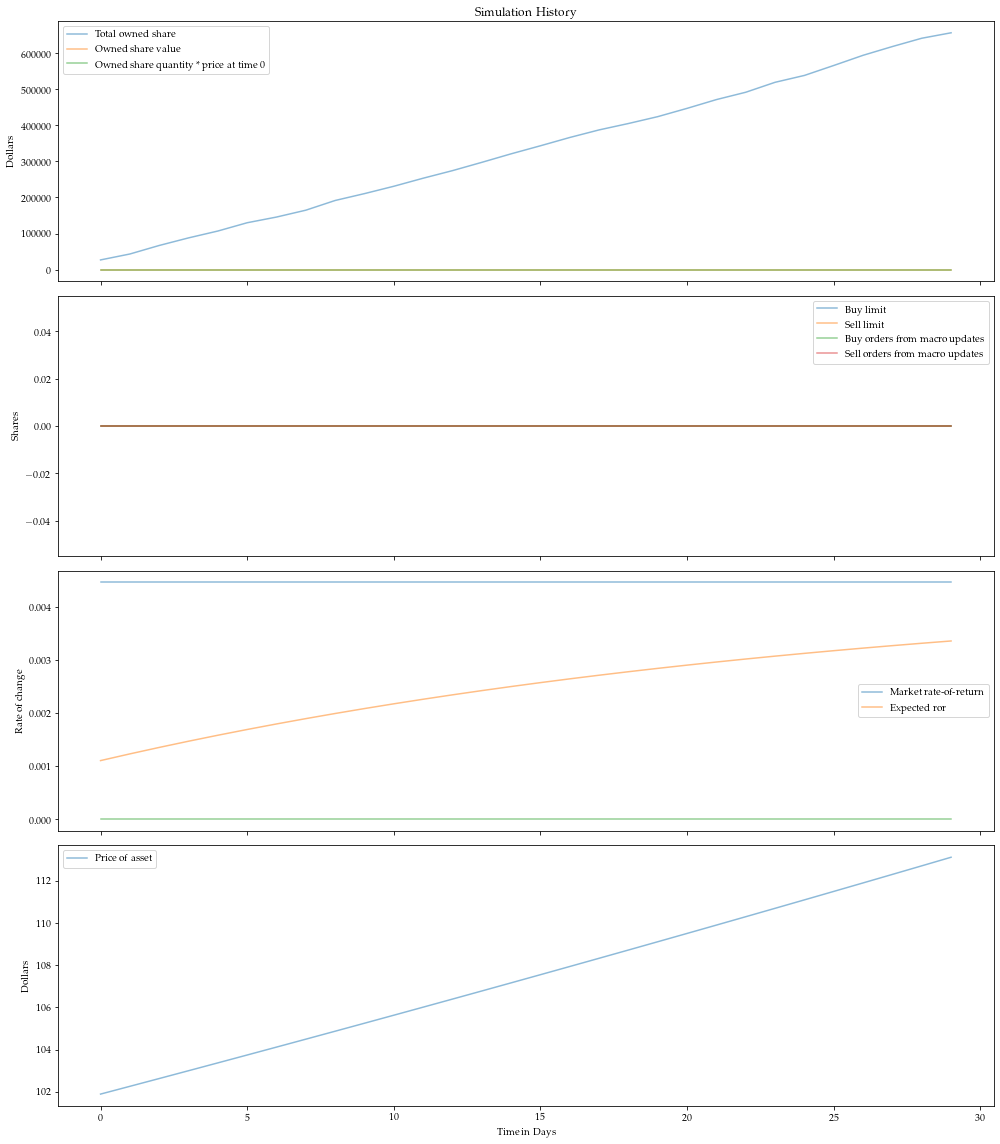

In [12]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


fig, ax = plt.subplots(4,
    sharex='col',
    figsize=(14,16),
)

ax[0].plot(data['total_assets'], alpha=0.5, label='Total owned share')
ax[0].plot([p * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share value')
ax[0].plot([100 * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share quantity * price at time 0')
ax[0].legend()

ax[1].plot(data['buy'], alpha=0.5, label='Buy limit')
ax[1].plot(-data['sell'], alpha=0.5, label='Sell limit')
ax[1].plot(data['buy_macro'], alpha=0.5, label='Buy orders from macro updates')
ax[1].plot(-data['sell_macro'], alpha=0.5, label='Sell orders from macro updates')
ax[1].legend()

ax[2].plot(data['ror'], alpha=0.5, label='Market rate-of-return')
ax[2].plot(data['expected_ror'], alpha=0.5, label='Expected ror')
ax[2].plot(np.zeros(data['expected_ror'].shape), alpha=0.5)
ax[2].legend()

ax[3].plot(data['prices'], alpha=0.5, label='Price of asset')
ax[3].legend()

ax[0].set_title("Simulation History")
ax[0].set_ylabel("Dollars")
ax[1].set_ylabel("Shares")
ax[2].set_ylabel("Rate of change")
ax[3].set_ylabel("Dollars")
ax[3].set_xlabel("Time in Days")

plt.tight_layout()
plt.savefig("asset_bubble_run.png")
plt.show()



In [9]:
sim.market.prices

[100,
 100.5693292621731,
 99.59111849469556,
 98.77886856684405,
 98.94561700635913,
 100.7497415008342,
 101.46175170550516,
 104.53881618946157,
 103.54452910873007,
 102.89159673352385,
 102.49531779445246,
 100.06251810853091,
 100.09089389324166,
 100.38564129254279,
 99.51696650018366,
 99.28184138795343,
 101.29272970172819,
 99.65517391694812,
 99.57682600634931,
 102.73201403656432,
 101.04416531982932,
 102.00075444212945,
 102.69362640380693,
 102.4761195577542,
 104.15798685703574,
 104.80693712489665,
 103.95750273888753,
 104.49545438349904,
 106.243912704191,
 106.79194116069287,
 104.47635355812847,
 103.54838690788341,
 104.8955027467425,
 103.54917873442497,
 102.56679579674345,
 101.36152754712515,
 102.92996122166352,
 102.15481355214602,
 102.47543798800905,
 102.44756617876314,
 102.05327586948407,
 101.13020062990265,
 102.08544461387915,
 101.77382209951509,
 101.82331338003287,
 103.18900178829445,
 104.28521869131637,
 104.59929384403203,
 104.64356522262872,

In [10]:
sim.market.dividends

[0.08333333333333333,
 0.08380777438514425,
 0.08299259874557964,
 0.08231572380570337,
 0.08245468083863261,
 0.08395811791736184,
 0.08455145975458764,
 0.08711568015788464,
 0.0862871075906084,
 0.08574299727793655,
 0.08541276482871038,
 0.0833854317571091,
 0.08340907824436805,
 0.08365470107711899,
 0.08293080541681971,
 0.08273486782329453,
 0.08441060808477349,
 0.08304597826412342,
 0.08298068833862442,
 0.08561001169713693,
 0.08420347109985776,
 0.08500062870177454,
 0.08557802200317244,
 0.08539676629812851,
 0.08679832238086312,
 0.08733911427074721,
 0.08663125228240627,
 0.08707954531958254,
 0.08853659392015917,
 0.08899328430057739,
 0.08706362796510705,
 0.08629032242323617,
 0.08741291895561874,
 0.08629098227868748,
 0.08547232983061955,
 0.0844679396226043,
 0.0857749676847196,
 0.08512901129345501,
 0.08539619832334087,
 0.08537297181563595,
 0.08504439655790338,
 0.08427516719158554,
 0.08507120384489929,
 0.08481151841626257,
 0.08485276115002739,
 0.08599083482

In [11]:
[sim.market.prices[i] / sim.market.dividends[i] for i in range(1, len(sim.market.prices))]

[1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 

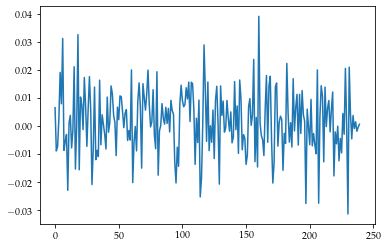

In [12]:
plt.plot(sim.market.ror_list())

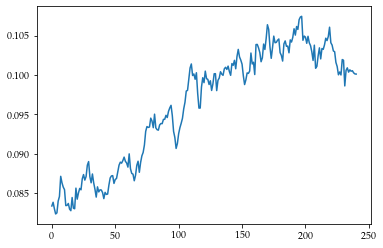

In [13]:
plt.plot(sim.market.dividends)

In [14]:
sim.market.next_dividend()

0.1009043685726209

In [15]:
sim.market.dividends[-1]

0.10014613567584595

## Getting an equilbrium level of wealth.

In [13]:
# initialize population
pop = build_population(
    SequentialPortfolioConsumerType,
    LUCAS0,
    rng=np.random.default_rng(1),
)


In [18]:
pop.agents[0].initialize_sim()
pop.agents[0].simulate()

{'pLvl': array([[1.0779763 ],
        [1.16203291],
        [1.25264394],
        [1.24646338],
        [1.19546396],
        [1.09818091],
        [1.183813  ],
        [1.00675028],
        [1.03938257],
        [1.21234224],
        [1.20636053],
        [1.30042806],
        [1.51682731],
        [1.50934326],
        [1.55826635],
        [1.6797742 ],
        [1.67148617],
        [1.94963178],
        [1.94001227],
        [2.09128725],
        [1.92110496],
        [2.07090562],
        [1.90238192],
        [1.96404476],
        [2.02770632],
        [2.01770159],
        [1.93514673],
        [1.9978716 ],
        [1.69905027],
        [1.83153592],
        [1.97435232],
        [2.30289672],
        [2.68611293],
        [2.77317924],
        [2.6597138 ],
        [2.55089082],
        [2.16935449],
        [2.53034845],
        [2.32443676],
        [0.99506599],
        [1.07265755],
        [0.9853681 ],
        [0.90518198],
        [0.76979406],
        [0.65465608],
  

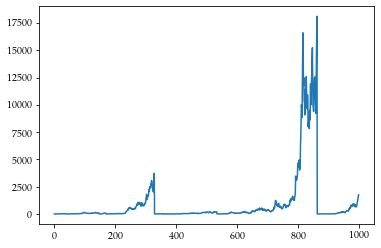

In [22]:
plt.plot(pop.agents[0].history['mNrm'])

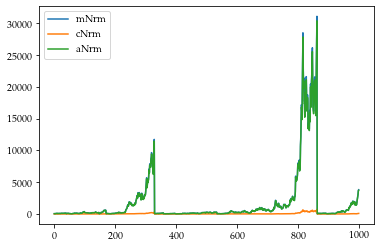

In [37]:
pop.agents[3].assign_parameters(**{'aNrmInitMean' : 4})
pop.agents[3].initialize_sim()
pop.agents[3].simulate()
plt.plot(pop.agents[3].history['mNrm'], label = 'mNrm')
plt.plot(pop.agents[3].history['cNrm'], label = 'cNrm')

plt.plot(pop.agents[3].history['mNrm'] - pop.agents[3].history['cNrm'], label = 'aNrm')


plt.legend()

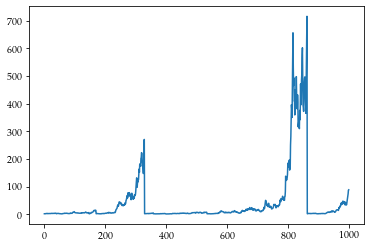

In [32]:
plt.plot(pop.agents[3].history['cNrm'])

In [38]:
pop.agents[5]

<HARK.ConsumptionSaving.ConsPortfolioModel.SequentialPortfolioConsumerType object at 0x7f3bde70b190.
Parameters:
cycles: 0
CRRA: 5
Rfree: [1.0]
DiscFac: 0.99
LivPrb: [0.9949620563926881]
PermGroFac: [1.0]
BoroCnstArt: 0.0
MaxKinks: 400
AgentCount: 1
aNrmInitMean: 0.0
aNrmInitStd: 0.0
pLvlInitMean: 0.0
pLvlInitStd: 0.0
PermGroFacAgg: 1.0
T_age: None
T_cycle: 1
PerfMITShk: False
aXtraMin: 0.001
aXtraMax: 100
aXtraNestFac: 1
aXtraCount: 200
aXtraExtra: [None]
PermShkStd: [0.1]
PermShkCount: 7
TranShkStd: [0.1]
TranShkCount: 7
UnempPrb: 0.05
UnempPrbRet: 0.005
IncUnemp: 0.3
IncUnempRet: 0.0
tax_rate: 0.0
T_retire: 0
vFuncBool: False
CubicBool: False
neutral_measure: False
NewbornTransShk: False
RiskyAvg: 1.08
RiskyStd: 0.2
RiskyCount: 5
AdjustPrb: 1.0
ShareCount: 25
DiscreteShareBool: False
num_per_type: 1000>

In [40]:
len(pop.agents)

1000